In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os

In [4]:
dstdir = "../data3"
stocks_dict = {}

cnt = 1
# r=root, d=directories, f=files
for r, d, f in os.walk(dstdir):
    for file in f:
        if file.endswith(".csv"):
            stocks_dict[file.split('.')[0]] = pd.read_csv(os.path.join(r, file), 
                                                              names=["date", "open", "high", "low", "close", "s_close5", "s_close10", "s_close20", "s_close60", "s_close120", "total_pattern", "amount", "s_amount5", "s_amount20", "s_amount60", "s_amount120"],
                                                           thousands=',')
            cnt += 1

In [5]:
stock_names = list(stocks_dict.keys())
stock_names[0], len(stock_names)

('000210', 191)

In [6]:
first_stock = stocks_dict[stock_names[0]]
first_stock.tail()

,date,open,high,low,close,s_close5,s_close10,s_close20,s_close60,s_close120,total_pattern,amount,s_amount5,s_amount20,s_amount60,s_amount120
595,2020-11-24,83600,85300,82900,84300,"83,060.00","82,680.00","81,510.00","82,841.67","84,240.83",0,379016,"261,614.60","357,051.30","397,103.03","316,385.70"
596,2020-11-25,85000,86600,83500,84500,"83,400.00","82,750.00","81,410.00","82,940.00","84,145.00",0,496274,"323,870.20","340,306.50","401,642.85","316,853.92"
597,2020-11-26,84600,84900,82400,83800,"83,780.00","82,990.00","81,430.00","82,850.00","84,065.83",0,298165,"334,414.00","332,217.95","391,445.48","316,467.92"
598,2020-11-27,84000,85700,83000,84200,"84,040.00","83,300.00","81,740.00","82,805.00","83,976.67",0,319359,"344,537.00","309,497.55","383,703.15","317,467.06"
599,2020-11-30,84300,84300,80000,80000,"83,360.00","82,990.00","81,870.00","82,568.33","83,874.17",39,1051932,"508,949.20","346,340.45","388,056.00","324,042.03"


In [7]:
first_stock.index[first_stock['date']=='2019-01-08'].tolist()

[131]

In [8]:
first_stock.index[first_stock['date']=='2019-11-29'].tolist()

[352]

In [9]:
first_stock.index[first_stock['date']=='2020-01-08'].tolist()

[377]

In [10]:
first_stock.index[first_stock['date']=='2020-11-27'].tolist()

[598]

In [11]:
print("총", len(stocks_dict), "종목")
if stocks_dict[stock_names[0]].index.is_unique:
    df_stock = stocks_dict[stock_names[0]]
    for i in range(0, len(stocks_dict)-1):
        df_next_stock = stocks_dict[stock_names[i+1]]
        if df_next_stock.index.is_unique:
            df_stock = pd.concat([df_stock[['close']],df_next_stock[['close']]], axis=1)
else:
    print("check if indices are unique")
print("전처리 후", len(df_stock.columns), "종목")

총 191 종목
전처리 후 191 종목


In [12]:
df_stock.columns = stock_names

In [13]:
df_stock.head()

,000210,000215,000720,000725,001880,002995,003070,003075,005965,006360,...,000880,000885,001390,001550,002380,002790,002795,00279K,002840,002960
0,80700,33350,54000,195500,12300,24400,8890,16500,15050,43700,...,30700,25600,26900,21700,290585,120223,52446,54100.0,36260,357000
1,76000,31800,55600,173500,12450,22900,8600,15600,15300,45200,...,30800,25050,26850,22300,288829,120722,52645,54000.0,36480,356000
2,76100,30800,55300,163000,12450,22900,8580,15700,14900,45950,...,30600,25500,26450,23550,287951,125211,51652,54600.0,36039,357000
3,76500,31600,53100,198500,12750,23900,8300,15900,15200,45200,...,30350,26700,25850,22850,287951,123216,51056,54900.0,36039,353500
4,73700,30150,55600,179000,13350,22650,8450,15150,16000,47550,...,31350,25000,26700,22800,280050,119724,52248,54500.0,36260,349000


In [14]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Columns: 191 entries, 000210 to 002960
dtypes: float64(2), int64(189)
memory usage: 895.4 KB


In [15]:
len(df_stock.columns)

191

In [16]:
s = df_stock.isnull().sum(axis=0)

In [17]:
s.where(s>0).count()

2

In [18]:
s2 = s.where(s>0).dropna()

In [19]:
s2

00104K    273.0
00279K    366.0
dtype: float64

In [20]:
df_stock = df_stock.dropna(axis=1)

In [21]:
len(df_stock.columns)

189

In [22]:
df_stock.isnull().sum().sum()

0

In [23]:
df_stock1 = df_stock.iloc[131:353]
df_stock1

,000210,000215,000720,000725,001880,002995,003070,003075,005965,006360,...,032640,000880,000885,001390,001550,002380,002790,002795,002840,002960
131,97200,36250,60900,164000,14500,24400,8000,15750,16400,43450,...,17900,31600,19050,17950,31650,266443,65250,28160,37287,334000
132,100000,37250,60900,164000,14600,24850,8010,16000,16850,43850,...,17600,32300,19150,18400,31500,258542,66347,28110,36920,331500
133,96800,37000,61400,163500,14600,25850,8230,15800,17200,45500,...,17150,32550,19150,18250,31350,258981,65848,28110,36994,329000
134,97900,37200,60700,173000,14650,24950,8070,15700,16850,44700,...,16750,33550,19150,18200,31450,260736,66347,27812,36847,326000
135,95900,37250,60800,180000,15050,25600,8180,15900,16850,45450,...,16800,33600,19350,18350,31750,255908,68742,27812,36773,323500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,94100,40450,40950,146500,20200,40900,9310,16650,18800,30000,...,14100,24550,29250,11450,16200,193138,79700,32700,56000,338000
349,94200,40350,40800,148000,20700,42150,9320,17150,18300,29700,...,13950,24800,30500,11400,15700,190943,77300,32850,55500,337000
350,93600,40200,41350,147000,20450,40750,9340,17100,18450,30100,...,13750,24550,30950,11050,15800,194016,79600,32350,56100,334000
351,92100,40250,40700,144500,20050,40050,9130,16900,18550,30100,...,13600,23900,30300,10900,15100,191821,82100,32200,56200,331000


In [24]:
df_stock2 = df_stock.iloc[377:599]
df_stock2

,000210,000215,000720,000725,001880,002995,003070,003075,005965,006360,...,032640,000880,000885,001390,001550,002380,002790,002795,002840,002960
377,82600,39300,40600,110500,19250,32200,9520,17150,21450,29250,...,13450,23550,34700,11450,15500,204990,84200,34950,57400,316000
378,83600,39350,41700,122500,19300,33500,9280,17350,21000,30050,...,13300,23800,27850,11450,15900,204990,84200,35250,58000,317000
379,83600,39350,41250,118500,19450,34300,9240,17300,20700,29950,...,13100,23700,27550,11400,15950,204990,86400,35350,58200,312000
380,84100,40150,42050,122500,19450,34300,9320,17350,21000,30100,...,13200,23600,27400,12800,15950,204990,90000,35150,57800,310000
381,84600,40300,41800,120000,19550,34500,9160,17250,20800,30650,...,13150,23600,27650,12700,16350,204990,90300,33400,57800,309000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,83400,45650,35100,181500,28050,41150,19750,35300,25550,32900,...,11450,26350,48000,20000,20350,171000,55200,19600,105500,261500
595,84300,46900,33600,190000,27800,44000,20500,33800,25050,31700,...,11550,25800,48800,20050,19350,171500,55300,19650,104500,268500
596,84500,48000,34550,183000,28200,41600,20750,33350,25350,31800,...,11400,26100,49200,20850,19450,168500,53600,19900,104000,271000
597,83800,47600,34650,179000,29200,40150,20450,43350,25100,31800,...,11950,26700,48500,21400,19450,168500,53700,20150,105000,268000


In [121]:
def make_cor_matrix_to_graph(df):
    cor_matrix = df.iloc[:, 0:].corr()
    stock_codes = cor_matrix.index.values
    cor_matrix = np.asmatrix(cor_matrix)
    G = nx.from_numpy_matrix(cor_matrix)
    G = nx.relabel_nodes(G, lambda x: stock_codes[x])
    return G

In [122]:
G1 = make_cor_matrix_to_graph(df_stock1)
G1.edges(data=True);

In [123]:
G2 = make_cor_matrix_to_graph(df_stock2)
G2.edges(data=True);

In [237]:
def create_corr_network_5(G, corr_direction, min_correlation):
    period = ""
    
    if G == G1:
        period = "BC"
    else:
        period = "AC"
        
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if weight["weight"] == 1:
            H.remove_edge(stock1, stock2)
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges, weights = zip(*nx.get_edge_attributes(H, 'weight').items())
    
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    d = dict(nx.degree(H))
    d = dict([(k, v) for k, v in d.items() if v>0])
    
    nodelist, node_sizes = zip(*d.items())
    
    positions = nx.kamada_kawai_layout(H)
    
    plt.figure(figsize=(15,15))
    
    nx.draw_networkx_nodes(H,positions,node_color="#DA70D6",nodelist=nodelist,
                          node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    labels = {}
    for node in nodelist:
        labels[node] = node
    nx.draw_networkx_labels(H, positions, labels, font_size=12,
                           font_family='sans-serif')
    
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu
    else:
        edge_colour = plt.cm.PuRd
        
    centrality = nx.eigenvector_centrality(H)
#     print(['code: %s, cent: %0.2f'%(node,centrality[node]) for node in centrality])
        
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          width=weights,edge_colour=weights, edge_cmap=edge_colour,
                          edge_vmin=min(weights), edge_vmax=max(weights))
    
    plt.axis('off')
    
#     nx.write_edgelist(H, "test.edgelist", data=["weight"])
    nx.write_pajek(H, "../net/net_{0}_{1}_{2}.net".format(period, corr_direction, min_correlation))
#     plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show()

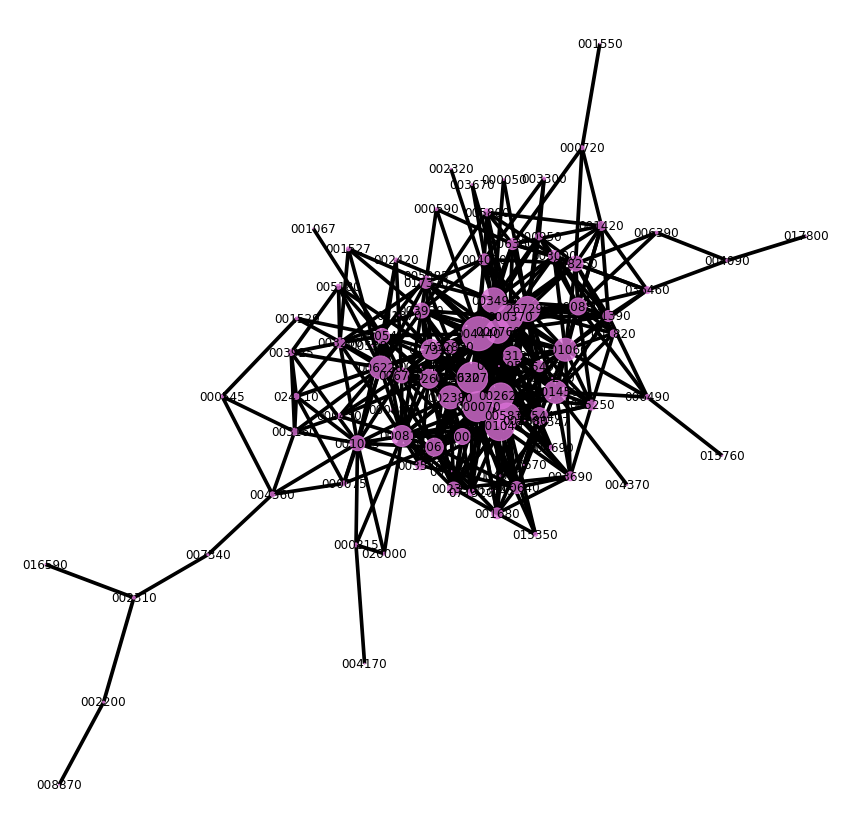

In [238]:
create_corr_network_5(G1, corr_direction="positive", min_correlation=0.90)

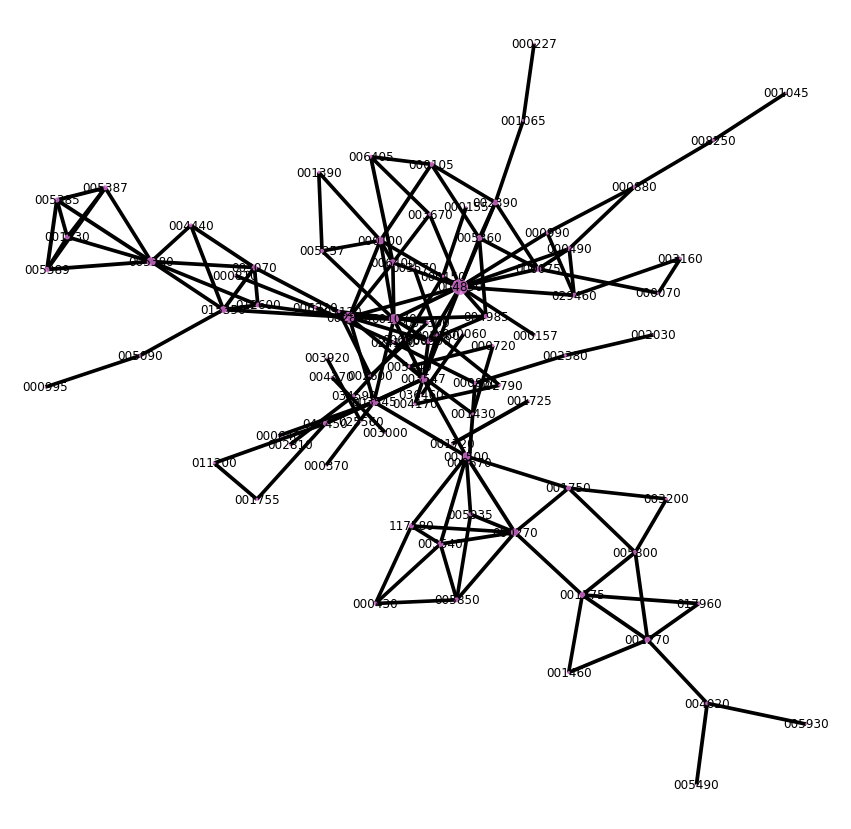

In [239]:
create_corr_network_5(G2, corr_direction="positive", min_correlation=0.90)